<a href="https://colab.research.google.com/github/Rochit-R/HCL-Internship/blob/main/Student_Performance_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

📊 Initial Dataset Preview:
  student_id  age  gender  study_hours_per_day  social_media_hours  \
0      S1000   23  Female                  0.0                 1.2   
1      S1001   20  Female                  6.9                 2.8   
2      S1002   21    Male                  1.4                 3.1   
3      S1003   23  Female                  1.0                 3.9   
4      S1004   19  Female                  5.0                 4.4   

   netflix_hours part_time_job  attendance_percentage  sleep_hours  \
0            1.1            No                   85.0          8.0   
1            2.3            No                   97.3          4.6   
2            1.3            No                   94.8          8.0   
3            1.0            No                   71.0          9.2   
4            0.5            No                   90.9          4.9   

  diet_quality  exercise_frequency parental_education_level internet_quality  \
0         Fair                   6                 

<ipython-input-5-8ef5c634ff8e>:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["parental_education_level"].fillna(df["parental_education_level"].mode()[0], inplace=True)


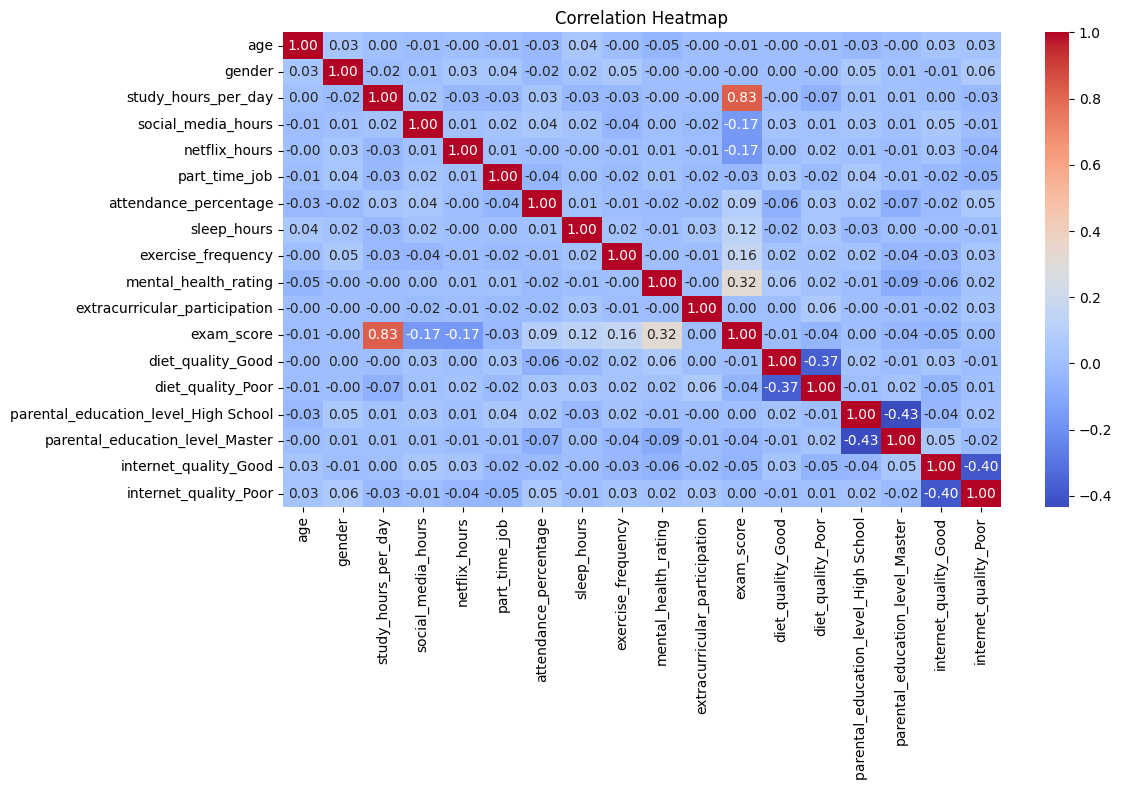


📊 Model Evaluation Metrics:
✅ Mean Absolute Error (MAE): 4.96
✅ Mean Squared Error (MSE): 38.80
✅ Root Mean Squared Error (RMSE): 6.23
✅ R² Score: 0.85


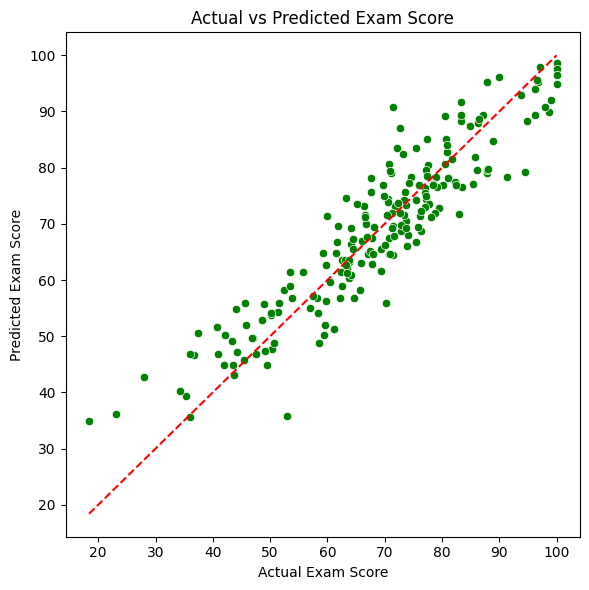

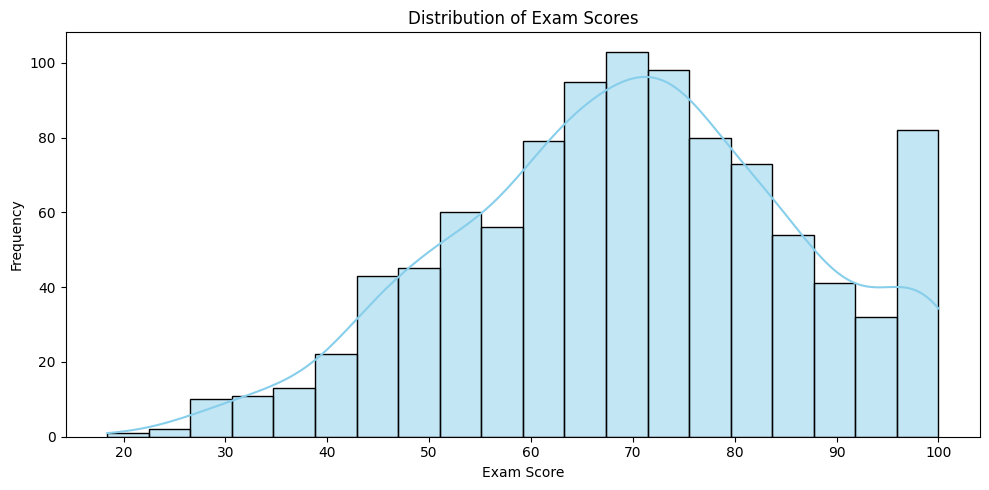

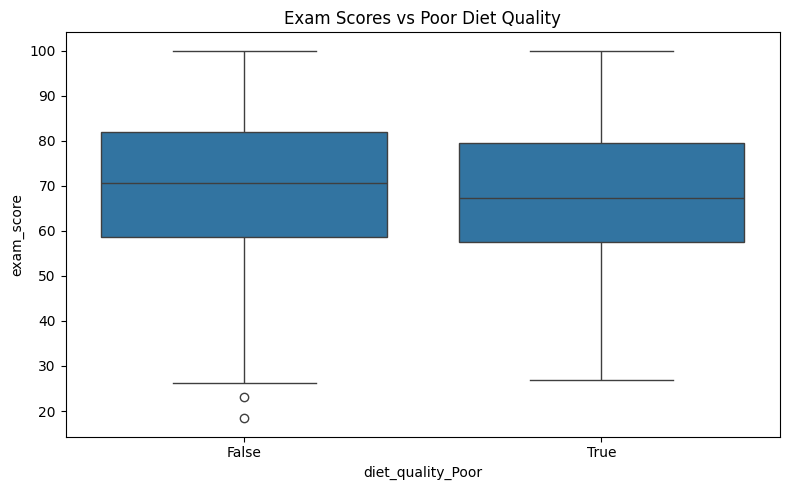


✅ Analysis Complete!


In [5]:
# student_performance_analysis.py

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load Dataset
df = pd.read_csv("/content/student_habits_performance.csv")

# 1. Display Initial Data Table
print("📊 Initial Dataset Preview:")
print(df.head())

# 2. Missing Values
print("\n🔍 Missing Values:")
print(df.isnull().sum())

# Fill missing values (mode for categorical)
df["parental_education_level"].fillna(df["parental_education_level"].mode()[0], inplace=True)

# 3. Descriptive Statistics
print("\n📈 Descriptive Statistics:")
print(df.describe())

# 4. Data Cleaning
# Drop ID column
df.drop(columns=["student_id"], inplace=True)

# 5. Label Encoding for Binary Columns
binary_cols = ["gender", "part_time_job", "extracurricular_participation"]
le = LabelEncoder()
for col in binary_cols:
    df[col] = le.fit_transform(df[col])

# 6. One-Hot Encoding for Nominal Categorical Columns
df = pd.get_dummies(df, drop_first=True)

# 7. Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

# 8. Feature-Target Split
X = df.drop("exam_score", axis=1)
y = df["exam_score"]

# 9. Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 10. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 11. Model Training - Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 12. Model Evaluation
y_pred = model.predict(X_test)

print("\n📊 Model Evaluation Metrics:")
print(f"✅ Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred):.2f}")
print(f"✅ Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred):.2f}")
print(f"✅ Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")
print(f"✅ R² Score: {r2_score(y_test, y_pred):.2f}")

# 13. Visualization: Actual vs Predicted
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred, color="green")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Exam Score")
plt.ylabel("Predicted Exam Score")
plt.title("Actual vs Predicted Exam Score")
plt.tight_layout()
plt.show()

# 14. Visualization: Distribution of Scores
plt.figure(figsize=(10, 5))
sns.histplot(df["exam_score"], bins=20, kde=True, color="skyblue")
plt.title("Distribution of Exam Scores")
plt.xlabel("Exam Score")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# 15. Bar Plot of Diet Quality
plt.figure(figsize=(8, 5))
sns.boxplot(x="diet_quality_Poor", y="exam_score", data=df)
plt.title("Exam Scores vs Poor Diet Quality")
plt.tight_layout()
plt.show()

print("\n✅ Analysis Complete!")